# LIN 373N Final Project by Veronica Alejandro, Tran Nguyen #
Our goal for this project is to train different classifier models to classify the rating of a product based on its review. We will be using the Kaggle dataset "Women's E-commerce Clothing Review." 

### 01. Imports ###


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import f1_score

import numpy as np 
import collections
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

### 02. Downloading + processing data ###


In [ ]:

# download dataset
data = pd.read_csv('/content/drive/My Drive/reviews.csv', encoding = 'utf-8')
# create dataframe using only review text + rating
df = data[['Review Text', 'Rating']]
df.sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of                                              Review Text  Rating
0      Absolutely wonderful - silky and sexy and comf...       4
1      Love this dress!  it's sooo pretty.  i happene...       5
2      I had such high hopes for this dress and reall...       3
3      I love, love, love this jumpsuit. it's fun, fl...       5
4      This shirt is very flattering to all due to th...       5
...                                                  ...     ...
23481  I was very happy to snag this dress at such a ...       5
23482  It reminds me of maternity clothes. soft, stre...       3
23483  This fit well, but the top was very see throug...       3
23484  I bought this dress for a wedding i have this ...       3
23485  This dress in a lovely platinum is feminine an...       5

[23486 rows x 2 columns]>

### 03. Classifier models ###

#### Decision Trees ####


Prep Work

In [ ]:
# Removing datapoints having missing values and duplicate Review text
df_after_drop = df[df['Review Text'].notnull()]
df_after_drop = df_after_drop.drop_duplicates(['Review Text'],keep='first')

## Train-test split
X = df_after_drop['Review Text']
y = df_after_drop['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

## BoW to vectorize
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english', min_df = 5)

#transform CV
cv_train = CountVec.fit_transform(X_train.values.astype('str'))
cv_test = CountVec.transform(X_test)

#create dataframe; the more readable version of the above training df
cv_train_df = pd.DataFrame(cv_train.toarray(),columns=CountVec.get_feature_names_out())
cv_test_df = pd.DataFrame(cv_test.toarray(), columns=CountVec.get_feature_names_out())

## TFID
#vectorizer = TfidfVectorizer(stop_words='english', min_df = 5)
#tfid_train = vectorizer.fit_transform(X_train)
#tfid_test = vectorizer.transform(X_test)

#dataframe for TFID
#tfid_train_df = pd.DataFrame(tfid_train.toarray(),columns=vectorizer.get_feature_names_out())
#tfid_test_df = pd.DataFrame(tfid_test.toarray(),columns=vectorizer.get_feature_names_out())

In [ ]:
#combine
#feature_train = pd.concat([cv_train_df, tfid_train_df], axis=1)
#feature_test = pd.concat([cv_test_df, tfid_test_df], axis=1)

Decision Tree fit

In [ ]:
dt_params = {"min_samples_leaf": [1,1], "max_depth": [1, 10]}
dt = DecisionTreeClassifier() #this is empty
dt_clf = GridSearchCV(dt, dt_params)
dt_clf.fit(cv_train_df, y_train) 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 10], 'min_samples_leaf': [1, 1]})

Random Forest fit

In [ ]:
rf_params = {"min_samples_leaf": [1,2], "max_depth": [5, 10]}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(rf, rf_params)
rf_clf.fit(cv_train_df, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [1, 2]})

Model Evaluation

In [ ]:
dt_pred = dt_clf.predict(cv_test_df)
rf_pred = rf_clf.predict(cv_test_df)

print(f1_score(y_test, dt_pred, average= 'micro'))
print(f1_score(y_test, rf_pred, average= 'micro'))

0.5730694468987454
0.5626435766036402


In [ ]:
train_pred_dt = dt_clf.predict(cv_train_df)

print(f1_score(train_pred_dt, y_train, average= 'micro'))
#Not overfitting

0.5950515463917526


In [ ]:
print(dt_clf.best_params_)
print(rf_clf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1}
{'max_depth': 10, 'min_samples_leaf': 1}


In [ ]:
print('Accuracy')
print(metrics.accuracy_score(y_test, dt_pred))
print(metrics.accuracy_score(y_test, rf_pred))
print('MSE')
print(metrics.mean_squared_error(y_test, dt_pred))
print(metrics.mean_squared_error(y_test, rf_pred))


Accuracy
0.5730694468987454
0.5626435766036402
MSE
1.51669906343877
1.8609294928432585


Tree Model



[Text(0.7223507695507487, 0.9545454545454546, 'X[2505] <= 0.5\ngini = 0.627\nsamples = 16975\nvalue = [625, 1165, 2139, 3696, 9350]'),
 Text(0.5119072379367721, 0.8636363636363636, 'X[2120] <= 0.5\ngini = 0.658\nsamples = 14453\nvalue = [598, 1111, 2043, 3306, 7395]'),
 Text(0.3411501663893511, 0.7727272727272727, 'X[844] <= 0.5\ngini = 0.701\nsamples = 9867\nvalue = [529, 891, 1599, 2413, 4435]'),
 Text(0.23710482529118138, 0.6818181818181818, 'X[2507] <= 0.5\ngini = 0.718\nsamples = 8649\nvalue = [517, 853, 1500, 2134, 3645]'),
 Text(0.1559900166389351, 0.5909090909090909, 'X[1643] <= 0.5\ngini = 0.728\nsamples = 8146\nvalue = [512, 837, 1466, 2056, 3275]'),
 Text(0.08777038269550749, 0.5, 'X[873] <= 0.5\ngini = 0.747\nsamples = 6395\nvalue = [460, 751, 1267, 1585, 2332]'),
 Text(0.0524126455906822, 0.4090909090909091, 'X[1123] <= 0.5\ngini = 0.752\nsamples = 6210\nvalue = [457, 749, 1263, 1548, 2193]'),
 Text(0.026622296173044926, 0.3181818181818182, 'X[2877] <= 0.5\ngini = 0.745\ns

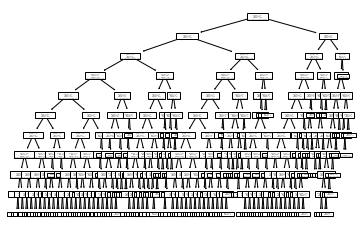

In [ ]:
plot_tree(dt_clf.best_estimator_)

Scores for uni + bi:
weighted:
0.493852598493613, 
0.44985786210927087

macro:
0.30683806437516437, 
0.23295535911473125

micro:
0.5113977734582081, 
0.5698886729104082

Scores for unigrams df: 
weighted:
0.5046160011027092, 
0.48827059566945696

macro:
0.31399753653968326
0.2580344156125312, 

micro:
0.5115744831242269, 
0.586499381516169

Scores for tfid + unigrams df:
weighted:
0.49358415824809737, 
0.5046779385810966

macro:
0.3069028673410615, 
0.27546992004002374

micro:
0.4983212581728221,
0.601519703127761




Scores for tfid df:
weighted:
0.4945963579789231, 
0.49586740317734457

macro:
0.30825899832969217, 
0.25915091295417325

micro: 
0.4986746775048595, 
0.5962184131471991





#### Multinomial Naive Bayes ####


In [ ]:
X, y = df['Review Text'], df['Rating']

# split into training and test data
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 9)

# vectorize the training data
vectorizer = CountVectorizer(stop_words = "english")
X_train_v = vectorizer.fit_transform(X_train.values.astype('str'))

In [ ]:
# fit model
nb_model = MultinomialNB()
nb_model.fit(X_train_v, y_train)

# vectorize the test data and predict 
x_test_v = vectorizer.transform(x_test.values.astype('str'))
y_hat_nb = nb_model.predict(x_test_v)

# get accuracy score + mse
acc_nb = metrics.accuracy_score(y_test, y_hat_nb)
mse_nb = metrics.mean_squared_error(y_test, y_hat_nb)
print('Accuracy: ' + str(acc_nb))
print('Mean Squared Error: ' + str(mse_nb))

print(np.take(vectorizer.get_feature_names(), nb_model.feature_log_prob_[0, :].argsort()[::-1][:10]))
print(np.take(vectorizer.get_feature_names(), nb_model.feature_log_prob_[1, :].argsort()[::-1][:10]))
print(np.take(vectorizer.get_feature_names(), nb_model.feature_log_prob_[2, :].argsort()[::-1][:10]))
print(np.take(vectorizer.get_feature_names(), nb_model.feature_log_prob_[3, :].argsort()[::-1][:10]))
print(np.take(vectorizer.get_feature_names(), nb_model.feature_log_prob_[4, :].argsort()[::-1][:10]))

Accuracy: 0.6393051771117166
Mean Squared Error: 0.7697547683923706
['dress' 'like' 'fabric' 'fit' 'just' 'size' 'small' 'looks' 'look' 'wear']
['dress' 'like' 'size' 'just' 'fabric' 'fit' 'look' 'ordered' 'love'
 'small']
['dress' 'like' 'size' 'fit' 'just' 'fabric' 'love' 'look' 'small'
 'really']
['dress' 'size' 'like' 'fit' 'love' 'wear' 'great' 'just' 'little'
 'fabric']
['love' 'dress' 'size' 'great' 'wear' 'fit' 'like' 'perfect' 'just'
 'color']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectorizer2 = TfidfVectorizer(stop_words = 'english')
X_train_v2 = vectorizer2.fit_transform(X_train.values.astype('str'))

nb_model2 = MultinomialNB()
nb_model2.fit(X_train_v2, y_train)

x_test_v2 = vectorizer2.transform(x_test.values.astype('str'))
y_hat_nb2 = nb_model.predict(x_test_v2)

print('Accuracy')
print(metrics.accuracy_score(y_test, y_hat_nb2))
print('MSE')
print(metrics.mean_squared_error(y_test, y_hat_nb2))
print()
print(np.take(vectorizer2.get_feature_names(), nb_model2.feature_log_prob_[0, :].argsort()[::-1][:10]))
print(np.take(vectorizer2.get_feature_names(), nb_model2.feature_log_prob_[1, :].argsort()[::-1][:10]))
print(np.take(vectorizer2.get_feature_names(), nb_model2.feature_log_prob_[2, :].argsort()[::-1][:10]))
print(np.take(vectorizer2.get_feature_names(), nb_model2.feature_log_prob_[3, :].argsort()[::-1][:10]))
print(np.take(vectorizer2.get_feature_names(), nb_model2.feature_log_prob_[4, :].argsort()[::-1][:10]))

Accuracy
0.603542234332425
MSE
1.2385899182561309

['like' 'dress' 'fabric' 'nan' 'material' 'fit' 'looks' 'shirt' 'looked'
 'just']
['dress' 'like' 'fabric' 'just' 'size' 'look' 'shirt' 'ordered' 'fit'
 'small']
['dress' 'like' 'just' 'size' 'fabric' 'fit' 'small' 'really' 'look'
 'large']
['dress' 'size' 'nan' 'like' 'great' 'fit' 'little' 'love' 'wear' 'small']
['love' 'nan' 'dress' 'great' 'size' 'wear' 'fit' 'perfect' 'comfortable'
 'flattering']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#change target variable
df = data[['Review Text', 'Recommended IND']]
X2, y2 = df['Review Text'], df['Recommended IND']
# split into training and test data
X_train, x_test, y_train, y_test = train_test_split(X2, y2, random_state = 9)

# vectorize the training data
vectorizer = CountVectorizer(stop_words = "english")
X_train_v = vectorizer.fit_transform(X_train.values.astype('str'))

# fit model
nb_model = MultinomialNB()
nb_model.fit(X_train_v, y_train)

# vectorize the test data and predict 
x_test_v = vectorizer.transform(x_test.values.astype('str'))
y_hat_nb = nb_model.predict(x_test_v)

# get accuracy score + mse
acc_nb = metrics.accuracy_score(y_test, y_hat_nb)
mse_nb = metrics.mean_squared_error(y_test, y_hat_nb)
print('Accuracy: ' + str(acc_nb))
print('Mean Squared Error: ' + str(mse_nb))


Accuracy: 0.8942438692098093
Mean Squared Error: 0.10575613079019074


#### Multinomial Logistic Regression ####

In [ ]:
lr_model = LogisticRegression(multi_class = 'multinomial', max_iter = 200)
lr_model.fit(X_train_v, y_train)

y_hat_lr = lr_model.predict(x_test_v)

acc_lr = metrics.accuracy_score(y_test, y_hat_lr)
mse_lr = metrics.mean_squared_error(y_test, y_hat_lr)

print('Accuracy: ' + str(acc_lr))
print('Mean Squared Error: ' + str(mse_lr))


Accuracy: 0.8848773841961853
Mean Squared Error: 0.11512261580381472


In [ ]:
lr_model2 = lr_model = LogisticRegression(multi_class = 'multinomial', random_state = 9, max_iter = 200)

vectorizer2 = TfidfVectorizer(stop_words = 'english')
X_train_v2 = vectorizer2.fit_transform(X_train.values.astype('str'))
x_test_v2 = vectorizer2.transform(x_test.values.astype('str'))

lr_model2.fit(X_train_v2, y_train)

y_hat_lr2 = lr_model.predict(x_test_v)
print('Accuracy')
print(metrics.accuracy_score(y_test, y_hat_lr2))
print('MSE')
print(metrics.mean_squared_error(y_test, y_hat_lr2))

Accuracy
0.8913487738419619
MSE
0.10865122615803814
